## Explore the relationship between metacritic score and the current features to find what features to encode or engineer

In [1]:
%config InlineBackend.figure_formats = ['retina']

import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import category_encoders as ce

In [2]:
oscars_df = pd.read_csv('oscar_movies_data.csv')

In [3]:
oscars_df.describe()

Unnamed: 0  runtime (mins)  metacritic score        budget  \
count  3303.000000     3303.000000       3303.000000  3.223000e+03   
mean   1788.924311      127.243112         76.183470  4.504520e+07   
std    1049.322783       23.834388         12.732737  4.926863e+07   
min       0.000000       70.000000         16.000000  6.500000e+04   
25%     886.500000      111.000000         68.000000  1.400000e+07   
50%    1781.000000      124.000000         78.000000  2.700000e+07   
75%    2649.500000      139.000000         86.000000  5.500000e+07   
max    3711.000000      224.000000        100.000000  3.210000e+08   

        Total_Noms   Award_Year  
count  3303.000000  3291.000000  
mean      5.398728  2000.761167  
std       3.500535    11.731420  
min       1.000000  1980.000000  
25%       2.000000  1990.500000  
50%       5.000000  2002.000000  
75%       8.000000  2011.000000  
max      16.000000  2020.000000

In [4]:
oscars_df.shape

(3303, 24)

In [5]:
oscars_df['Total_Noms'].value_counts()

1     519
2     379
3     318
5     305
4     296
6     284
7     266
8     264
9     207
10    150
12    108
11     99
13     78
16     16
14     14
Name: Total_Noms, dtype: int64

In [6]:
oscars_df.drop(columns = ['Unnamed: 0'],inplace=True)

<Figure size 2880x2880 with 0 Axes>

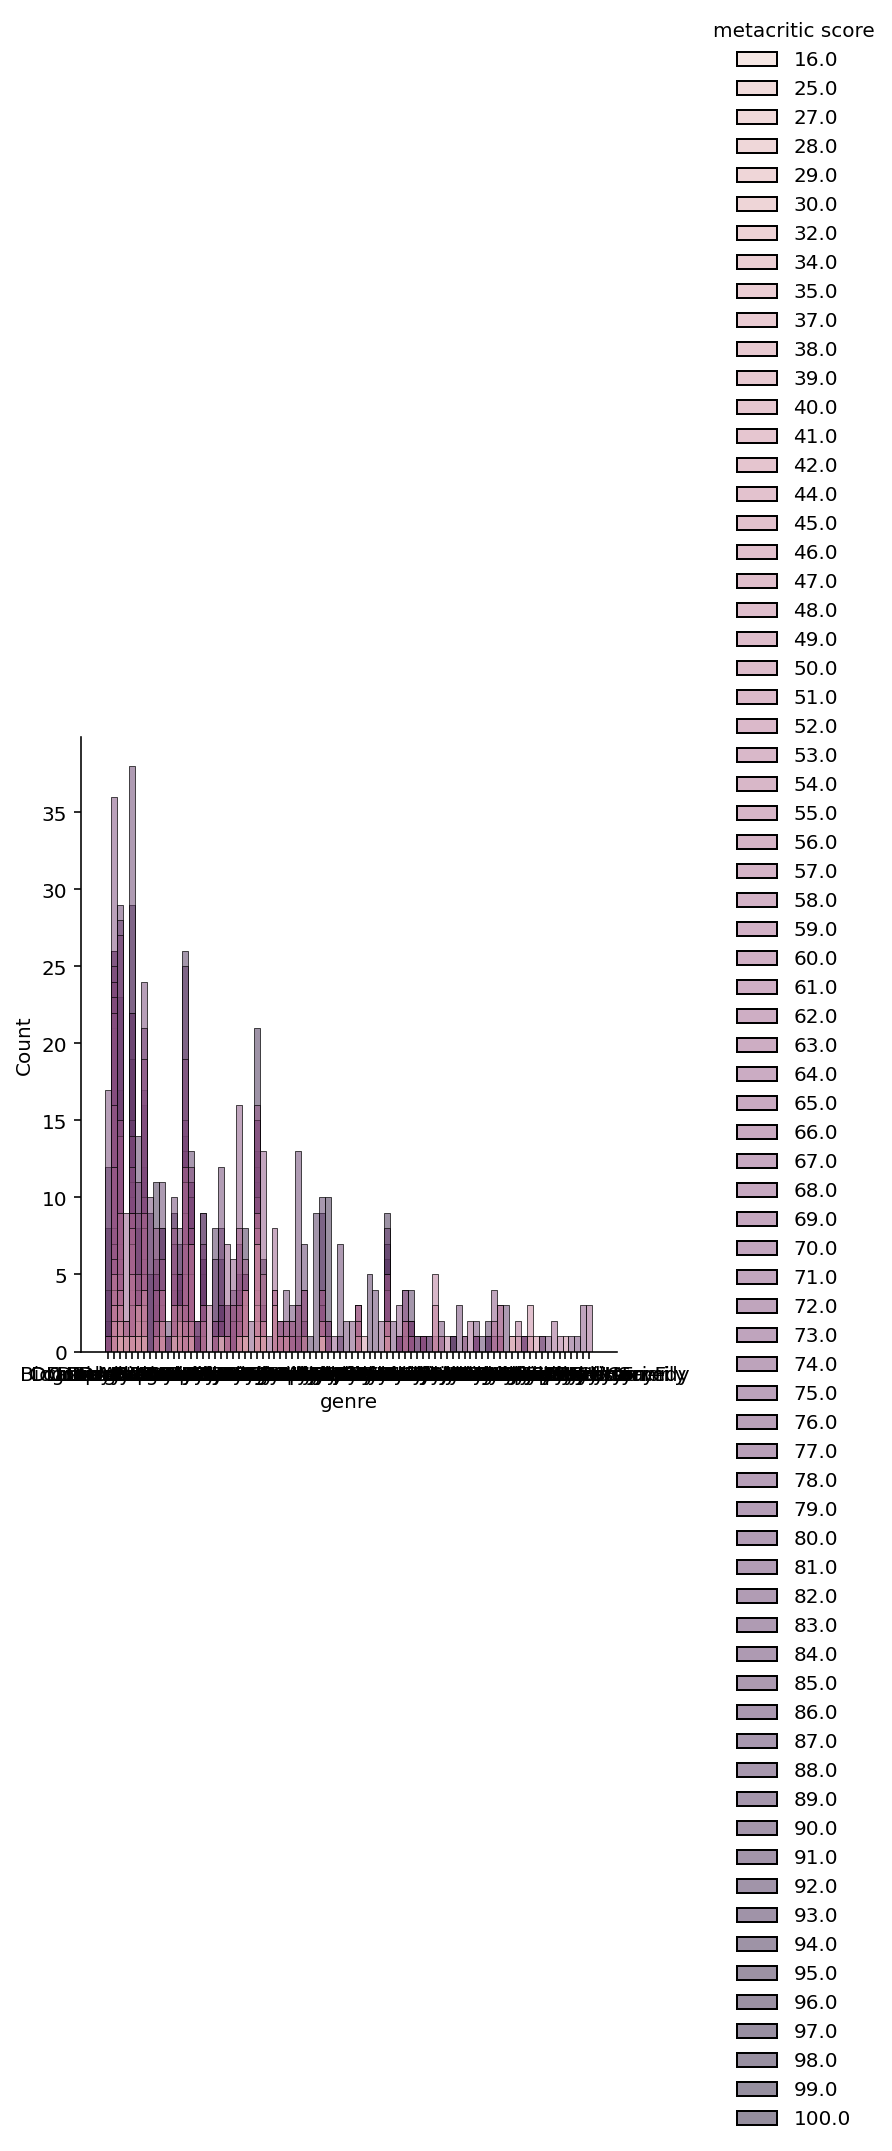

In [7]:
plt.figure(figsize=(40,40))
sns.displot(oscars_df, x="genre", hue="metacritic score");

<Figure size 2880x2880 with 0 Axes>

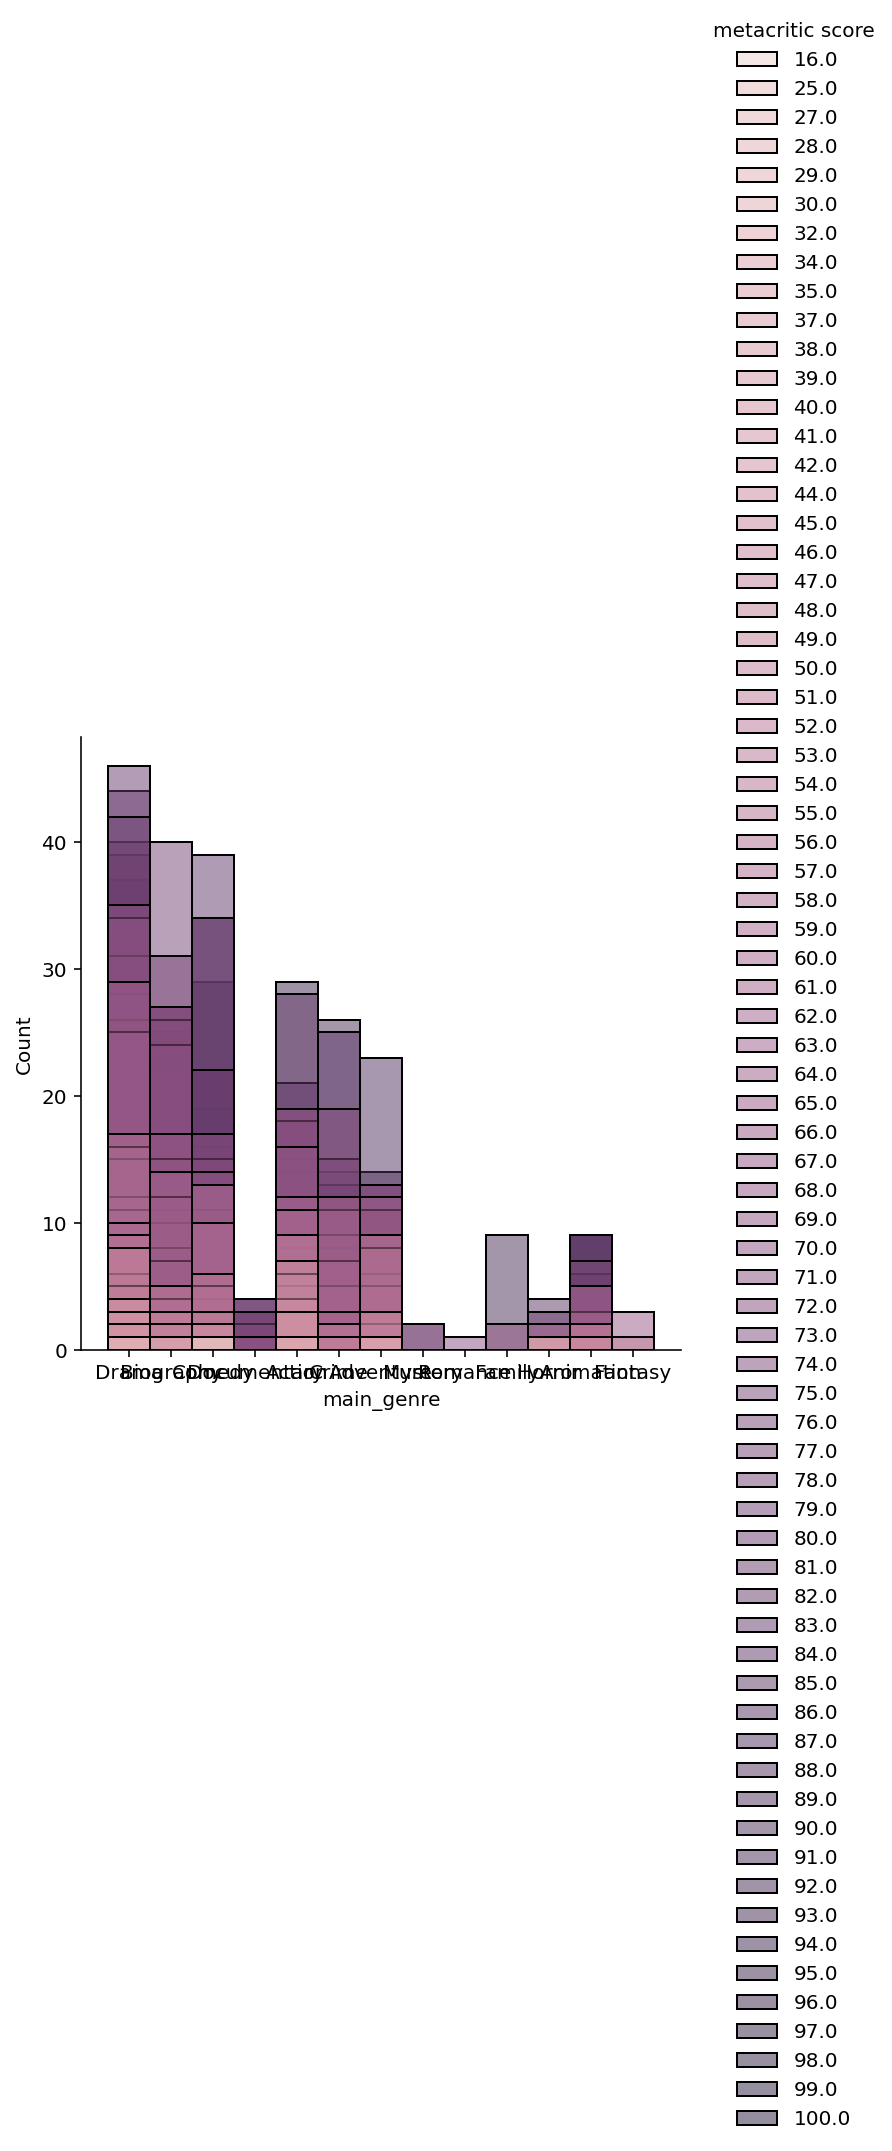

In [8]:
plt.figure(figsize=(40,40))
sns.displot(oscars_df, x="main_genre", hue="metacritic score");

## Create dummies for awards

In [9]:
top_ten = oscars_df['Awards'].value_counts().iloc[:10]
mask = oscars_df['Awards'].isin(top_ten.index)

In [10]:
oscars_df['Awards'][mask].value_counts()

Best Director                        122
Best Picture                         122
Best Motion Picture of the Year      121
Best Film Editing                    115
Best Actor in a Leading Role         113
Best Actor in a Supporting Role      113
Best Art Direction-Set Decoration    107
Best Cinematography                  105
Best Sound                           102
Best Actress in a Leading Role       102
Name: Awards, dtype: int64

In [11]:
top_awards= oscars_df['Awards'][mask]

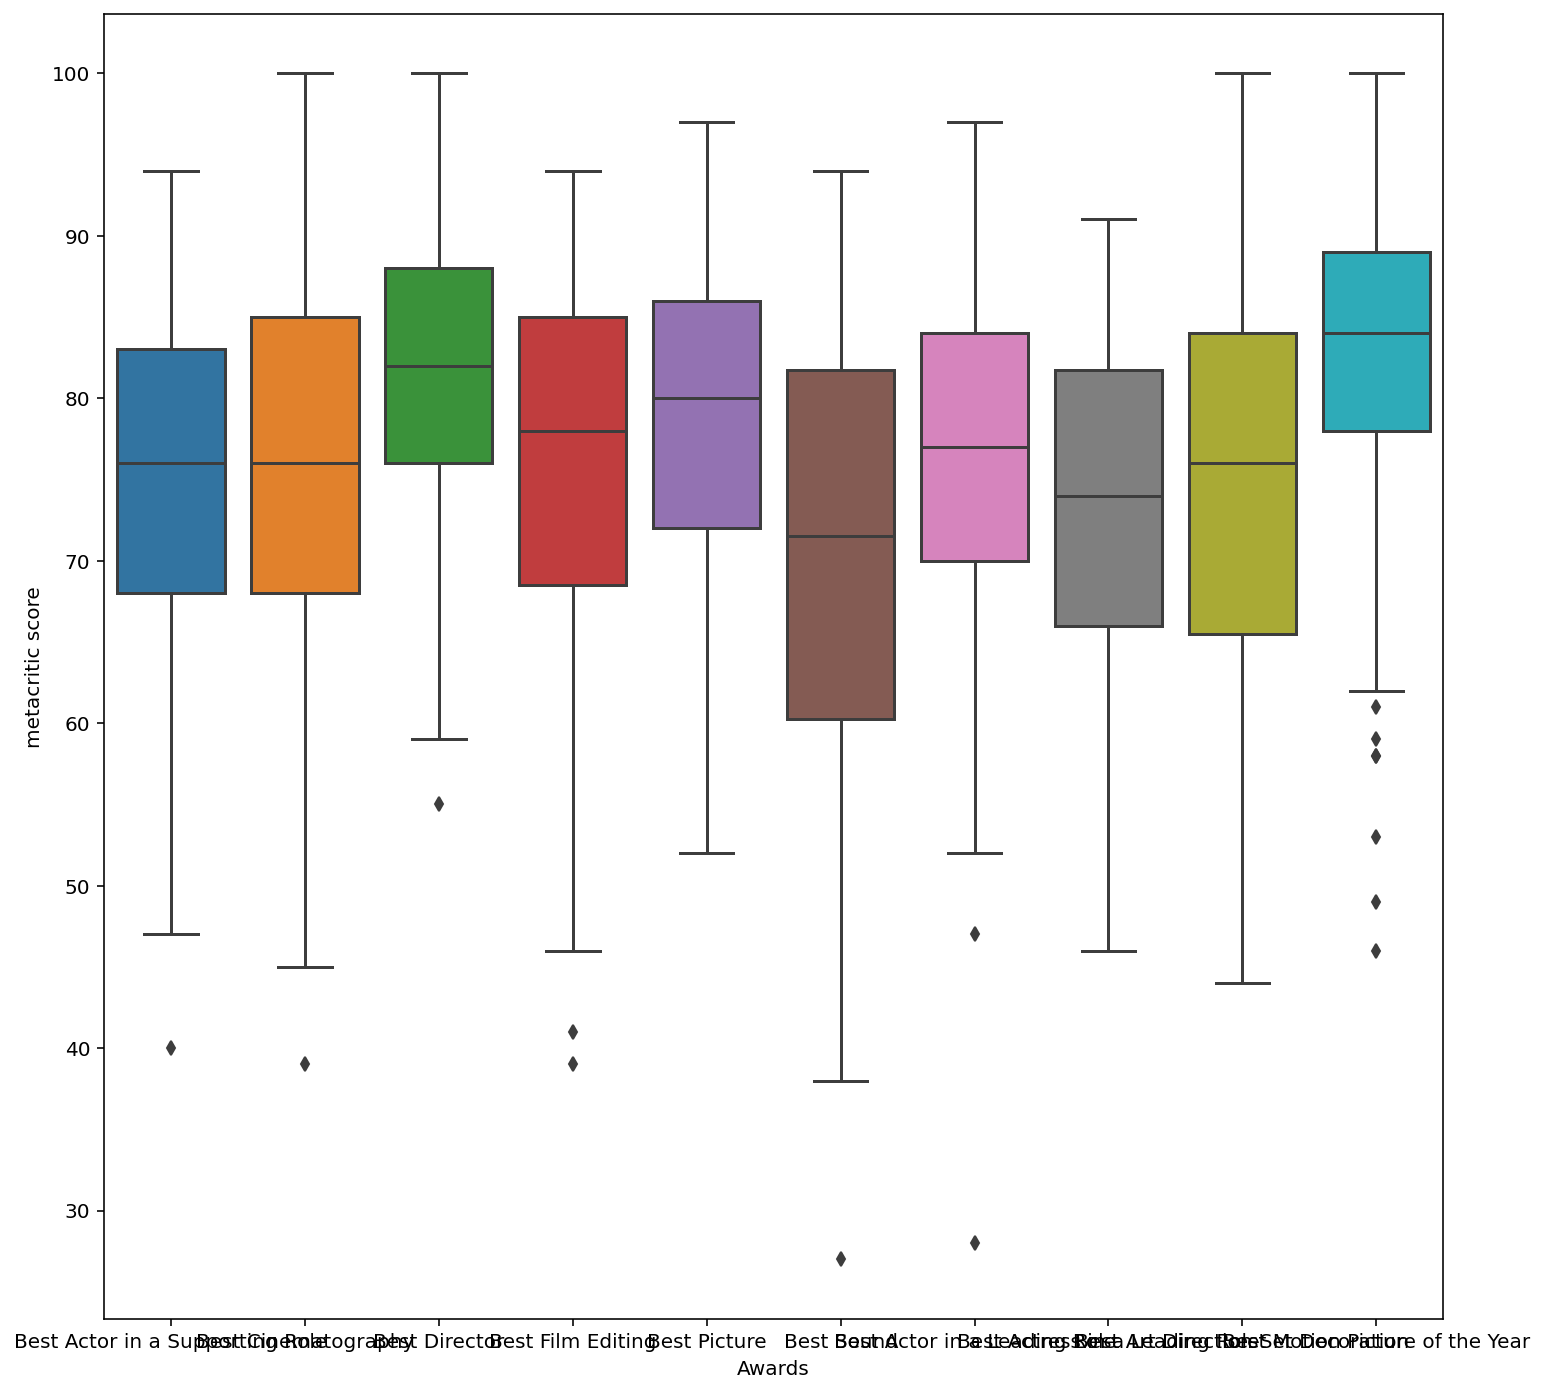

In [12]:
plt.figure(figsize=(12,12))
sns.boxplot(x=top_awards, y="metacritic score", data=oscars_df);

In [13]:
ax = sns.catplot(data=oscars_df, kind="bar", x=top_awards, y="metacritic score",palette = sns.color_palette('Greens'))
plt.xticks(rotation=90);
ax.savefig("output.png")

## Game plan create a count of previous entries sorted by release date create a rolling mean that will roll until it gets all the means excluding the current film


oscars_df.groupby(['director'])['metacritic score'].rolling(2).mean()

In [14]:
oscars_df.groupby(['Awards','Award_Year'])['metacritic score'].head()

0       92.0
1       92.0
2       92.0
3       92.0
4       92.0
        ... 
3297    40.0
3298    40.0
3300    57.0
3301    57.0
3302    55.0
Name: metacritic score, Length: 3017, dtype: float64

In [15]:
oscars_df.sort_values(by='release_date',inplace=True)

In [16]:
oscars_df.head()

IMDBId  movie title language country  runtime (mins) mpaarating  \
2776  tt0077716  Ice Castles  English     USA             108         PG   
2247  tt0079638    Norma Rae  English     USA             114         PG   
2246  tt0079638    Norma Rae  English     USA             114         PG   
2245  tt0079638    Norma Rae  English     USA             114         PG   
2248  tt0079638    Norma Rae  English     USA             114         PG   

      metacritic score        budget    distributionCompany  \
2776              51.0  3.405366e+07      Columbia Pictures   
2247              61.0  5.688241e+07  Twentieth Century Fox   
2246              61.0  5.688241e+07  Twentieth Century Fox   
2245              61.0  5.688241e+07  Twentieth Century Fox   
2248              61.0  5.688241e+07  Twentieth Century Fox   

                                                 Awards  ...     director  \
2776                          Best Music, Original Song  ...  Donald Wrye   
2247                                       Best Picture  ...  Martin Ritt   
2246                          Best Music, Original Song  ...  Martin Ritt   
2245                     Best Actress in a Leading Role  ...  Martin Ritt   
2248  Best Writing, Screenplay Based on Material fro...  ...  Martin Ritt   

              Lead_Actor Supporting_Actor_1 Supporting_Actor_2  \
2776  Lynn-Holly Johnson       Robby Benson   Colleen Dewhurst   
2247         Sally Field       Beau Bridges        Ron Leibman   
2246         Sally Field       Beau Bridges        Ron Leibman   
2245         Sally Field       Beau Bridges        Ron Leibman   
2248         Sally Field       Beau Bridges        Ron Leibman   

                genre main_genre subgenre release_date  season Award_Year  
2776  Drama' 'Romance      Drama  Romance   1978-12-31  Winter     1980.0  
2247            Drama      Drama      NaN   1979-03-02  Winter     1980.0  
2246            Drama      Drama      NaN   1979-03-02  Winter     1980.0  
2245            Drama      Drama      NaN   1979-03-02  Winter     1980.0  
2248            Drama      Drama      NaN   1979-03-02  Winter     1980.0  

[5 rows x 23 columns]

In [17]:
oscars_df.head()

IMDBId  movie title language country  runtime (mins) mpaarating  \
2776  tt0077716  Ice Castles  English     USA             108         PG   
2247  tt0079638    Norma Rae  English     USA             114         PG   
2246  tt0079638    Norma Rae  English     USA             114         PG   
2245  tt0079638    Norma Rae  English     USA             114         PG   
2248  tt0079638    Norma Rae  English     USA             114         PG   

      metacritic score        budget    distributionCompany  \
2776              51.0  3.405366e+07      Columbia Pictures   
2247              61.0  5.688241e+07  Twentieth Century Fox   
2246              61.0  5.688241e+07  Twentieth Century Fox   
2245              61.0  5.688241e+07  Twentieth Century Fox   
2248              61.0  5.688241e+07  Twentieth Century Fox   

                                                 Awards  ...     director  \
2776                          Best Music, Original Song  ...  Donald Wrye   
2247                                       Best Picture  ...  Martin Ritt   
2246                          Best Music, Original Song  ...  Martin Ritt   
2245                     Best Actress in a Leading Role  ...  Martin Ritt   
2248  Best Writing, Screenplay Based on Material fro...  ...  Martin Ritt   

              Lead_Actor Supporting_Actor_1 Supporting_Actor_2  \
2776  Lynn-Holly Johnson       Robby Benson   Colleen Dewhurst   
2247         Sally Field       Beau Bridges        Ron Leibman   
2246         Sally Field       Beau Bridges        Ron Leibman   
2245         Sally Field       Beau Bridges        Ron Leibman   
2248         Sally Field       Beau Bridges        Ron Leibman   

                genre main_genre subgenre release_date  season Award_Year  
2776  Drama' 'Romance      Drama  Romance   1978-12-31  Winter     1980.0  
2247            Drama      Drama      NaN   1979-03-02  Winter     1980.0  
2246            Drama      Drama      NaN   1979-03-02  Winter     1980.0  
2245            Drama      Drama      NaN   1979-03-02  Winter     1980.0  
2248            Drama      Drama      NaN   1979-03-02  Winter     1980.0  

[5 rows x 23 columns]

In [18]:
oscars_df.shape

(3303, 23)

In [19]:
awards_dummies = pd.get_dummies(oscars_df['Awards'][mask],prefix='Awards')

In [20]:
oscars_df = pd.concat([oscars_df, awards_dummies], axis=1)

In [21]:
oscars_df.groupby('Awards')['IMDBId'].value_counts()

Awards                                                    IMDBId   
Best Achievement in Art Direction                         tt0293508    1
                                                          tt0308644    1
                                                          tt0338751    1
                                                          tt0339291    1
                                                          tt0343737    1
                                                                      ..
Best Writing, Screenplay Written Directly for the Screen  tt0211915    1
                                                          tt0249462    1
                                                          tt0265666    1
                                                          tt0280707    1
                                                          tt0285742    1
Name: IMDBId, Length: 3291, dtype: int64

In [22]:
oscars_df.drop_duplicates(subset=['IMDBId'],inplace=True)

In [23]:
oscars_df.sort_values(by='release_date',inplace=True)

In [57]:
oscars_df['Award_Prev_Score'] = oscars_df.groupby('Awards')['metacritic score'].shift(1)

In [59]:
oscars_df[oscars_df['Awards']=='Best Picture'][['release_date','metacritic score','Award_Prev_Score']]

release_date  metacritic score  Award_Prev_Score
3078   1994-04-15              81.0               NaN
617    2001-06-01              66.0              81.0
503    2001-12-19              92.0              66.0
2328   2002-01-04              72.0              92.0
1155   2002-01-18              90.0              72.0
2012   2002-02-08              86.0              90.0
1307   2002-12-20              72.0              86.0
2358   2003-01-24              81.0              72.0
1505   2003-02-14              80.0              81.0
142    2003-03-28              85.0              80.0
3162   2003-07-25              72.0              85.0
1133   2003-10-03              89.0              72.0
1518   2003-10-15              84.0              89.0
1448   2003-11-14              81.0              84.0
1663   2003-12-17              94.0              81.0

In [61]:
oscars_df['Award_Avg_Score'] = oscars_df.groupby('Awards')['Award_Prev_Score'].rolling(2).mean().reset_index(0,drop=True)

In [62]:
oscars_df[oscars_df['Awards']=='Best Picture'][['release_date','metacritic score','Award_Prev_Score','Award_Avg_Score']]

release_date  metacritic score  Award_Prev_Score  Award_Avg_Score
3078   1994-04-15              81.0               NaN              NaN
617    2001-06-01              66.0              81.0              NaN
503    2001-12-19              92.0              66.0             73.5
2328   2002-01-04              72.0              92.0             79.0
1155   2002-01-18              90.0              72.0             82.0
2012   2002-02-08              86.0              90.0             81.0
1307   2002-12-20              72.0              86.0             88.0
2358   2003-01-24              81.0              72.0             79.0
1505   2003-02-14              80.0              81.0             76.5
142    2003-03-28              85.0              80.0             80.5
3162   2003-07-25              72.0              85.0             82.5
1133   2003-10-03              89.0              72.0             78.5
1518   2003-10-15              84.0              89.0             80.5
1448   2003-11-14              81.0              84.0             86.5
1663   2003-12-17              94.0              81.0             82.5

In [65]:
oscars_df.Award_Avg_Score.fillna(oscars_df.Award_Prev_Score, inplace=True)

## Create some numeric columns around metacritic score

In [66]:
oscars_df['Dir_Prev_Score'] = oscars_df.groupby('director')['metacritic score'].shift(1)

In [67]:
oscars_df[oscars_df['director']=='Martin Scorsese'][['release_date','metacritic score','Dir_Prev_Score']]

release_date  metacritic score  Dir_Prev_Score
1742   1980-12-19              89.0             NaN
1459   1986-10-17              77.0            89.0
569    1988-09-09              80.0            77.0
2344   1990-09-21              90.0            80.0
2458   1991-11-15              73.0            90.0
74     1993-10-01              90.0            73.0
2044   1995-11-22              73.0            90.0
2819   1998-01-16              74.0            73.0
1307   2002-12-20              72.0            74.0
199    2004-12-25              77.0            72.0
907    2006-10-06              85.0            77.0
928    2011-11-23              83.0            85.0
2059   2013-12-25              75.0            83.0
2954   2017-01-13              79.0            75.0
296    2019-11-27              94.0            79.0

In [68]:
oscars_df['Director_Avg_Score'] = oscars_df.groupby('director')['Dir_Prev_Score'].rolling(2).mean().reset_index(0,drop=True)

In [69]:
oscars_df[oscars_df['director']=='Martin Scorsese'][['release_date','metacritic score','Dir_Prev_Score','Director_Avg_Score']]

release_date  metacritic score  Dir_Prev_Score  Director_Avg_Score
1742   1980-12-19              89.0             NaN                 NaN
1459   1986-10-17              77.0            89.0                 NaN
569    1988-09-09              80.0            77.0                83.0
2344   1990-09-21              90.0            80.0                78.5
2458   1991-11-15              73.0            90.0                85.0
74     1993-10-01              90.0            73.0                81.5
2044   1995-11-22              73.0            90.0                81.5
2819   1998-01-16              74.0            73.0                81.5
1307   2002-12-20              72.0            74.0                73.5
199    2004-12-25              77.0            72.0                73.0
907    2006-10-06              85.0            77.0                74.5
928    2011-11-23              83.0            85.0                81.0
2059   2013-12-25              75.0            83.0                84.0
2954   2017-01-13              79.0            75.0                79.0
296    2019-11-27              94.0            79.0                77.0

In [70]:
oscars_df.Director_Avg_Score.fillna(oscars_df.Dir_Prev_Score, inplace=True)

In [71]:
oscars_df[oscars_df['director']=='Martin Scorsese'][['release_date','metacritic score','Dir_Prev_Score','Director_Avg_Score']]

release_date  metacritic score  Dir_Prev_Score  Director_Avg_Score
1742   1980-12-19              89.0             NaN                 NaN
1459   1986-10-17              77.0            89.0                89.0
569    1988-09-09              80.0            77.0                83.0
2344   1990-09-21              90.0            80.0                78.5
2458   1991-11-15              73.0            90.0                85.0
74     1993-10-01              90.0            73.0                81.5
2044   1995-11-22              73.0            90.0                81.5
2819   1998-01-16              74.0            73.0                81.5
1307   2002-12-20              72.0            74.0                73.5
199    2004-12-25              77.0            72.0                73.0
907    2006-10-06              85.0            77.0                74.5
928    2011-11-23              83.0            85.0                81.0
2059   2013-12-25              75.0            83.0                84.0
2954   2017-01-13              79.0            75.0                79.0
296    2019-11-27              94.0            79.0                77.0

In [72]:
oscars_df.tail()

IMDBId                                        movie title language  \
2877  tt0373175                                       My Architect  English   
2922  tt3652526                                        Fire at Sea  Italian   
3015  tt0424024                                 Darwin's Nightmare  English   
3030  tt0240885                    Scottsboro: An American Tragedy  English   
3036  tt1787725  If a Tree Falls: A Story of the Earth Liberati...  English   

      country  runtime (mins) mpaarating  metacritic score     budget  \
2877      USA             116    Unrated              81.0        NaN   
2922    Italy             114    Unrated              87.0        NaN   
3015  Austria             107    Unrated              84.0        NaN   
3030      USA              84    Unrated              74.0        NaN   
3036      USA              85    Unrated              65.0  4800000.0   

              distributionCompany                      Awards  ...  \
2877             New Yorker Films  Best Documentary, Features  ...   
2922                  Kino Lorber    Best Documentary Feature  ...   
3015   International Film Circuit  Best Documentary, Features  ...   
3030  Public Broadcasting Service  Best Documentary, Features  ...   
3036                 Oscilloscope  Best Documentary, Features  ...   

      Awards_Best Picture Awards_Best Sound Dir_Prev_Score Director_Avg_Score  \
2877                  NaN               NaN            NaN                NaN   
2922                  NaN               NaN            NaN                NaN   
3015                  NaN               NaN            NaN                NaN   
3030                  NaN               NaN            NaN                NaN   
3036                  NaN               NaN            NaN                NaN   

     Total_Director_Movies Lead_Actor_Prev_Score Lead_Actor_Avg_Score  \
2877                     1                   NaN                  NaN   
2922                     1                   NaN                  NaN   
3015                     1                   NaN                  NaN   
3030                     1                  88.0                 88.0   
3036                     1                   NaN                  NaN   

     Total_Movies_Lead_Actor Award_Prev_Score Award_Avg_Score  
2877                       1             80.0            79.5  
2922                       1             83.0            84.5  
3015                       1             81.0            80.5  
3030                       2             84.0            82.5  
3036                       1             74.0            79.0  

[5 rows x 41 columns]

In [73]:
oscars_df.groupby(['director','release_date'])['Director_Avg_Score'].mean()

director              release_date
"Gavin O'Connor"      2000-03-03       NaN
                      2011-09-09      75.0
Aaron Blaise          2003-11-07       NaN
Aaron Sorkin          2018-01-05       NaN
Abderrahmane Sissako  2014-12-10       NaN
                                      ... 
Yorgos Lanthimos      2018-12-21      77.5
Yôjirô Takita         2009-06-19       NaN
Zana Briski           2005-03-11       NaN
Zaza Urushadze        2015-04-17       NaN
Ziad Doueiri          2019-06-25       NaN
Name: Director_Avg_Score, Length: 1124, dtype: float64

In [74]:
oscars_df.groupby('director')['movie title'].count()

director
"Gavin O'Connor"        2
Aaron Blaise            1
Aaron Sorkin            1
Abderrahmane Sissako    1
Adam McKay              2
                       ..
Yôji Yamada             1
Yôjirô Takita           1
Zana Briski             1
Zaza Urushadze          1
Ziad Doueiri            1
Name: movie title, Length: 613, dtype: int64

In [75]:
oscars_df['Total_Director_Movies']=oscars_df.groupby(['director'])['movie title'].transform('count')

In [76]:
oscars_df['Total_Director_Movies'].value_counts()

1     394
2     204
3     165
4     100
6      84
5      50
11     33
12     24
7      21
20     20
9      18
15     15
8       8
Name: Total_Director_Movies, dtype: int64

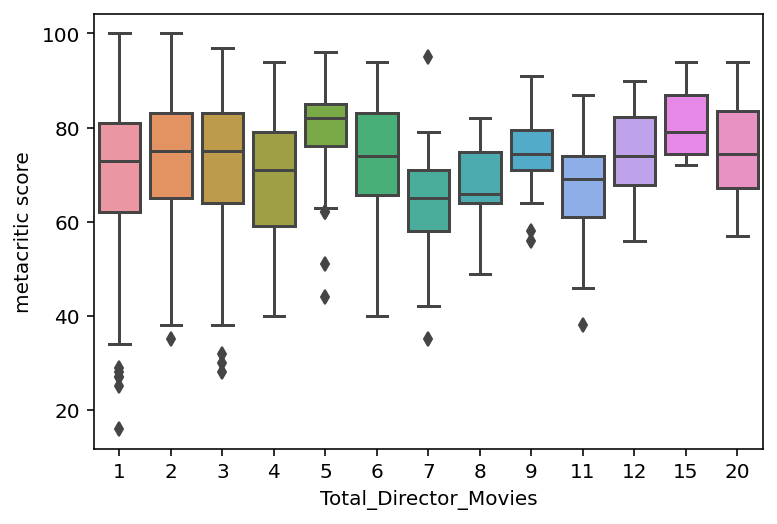

In [77]:
sns.boxplot(x='Total_Director_Movies', y="metacritic score", data=oscars_df);

In [78]:
top_ten = oscars_df['director'].value_counts().iloc[:10]
mask = oscars_df['director'].isin(top_ten.index)

In [79]:
top_directors = oscars_df['director'][mask]

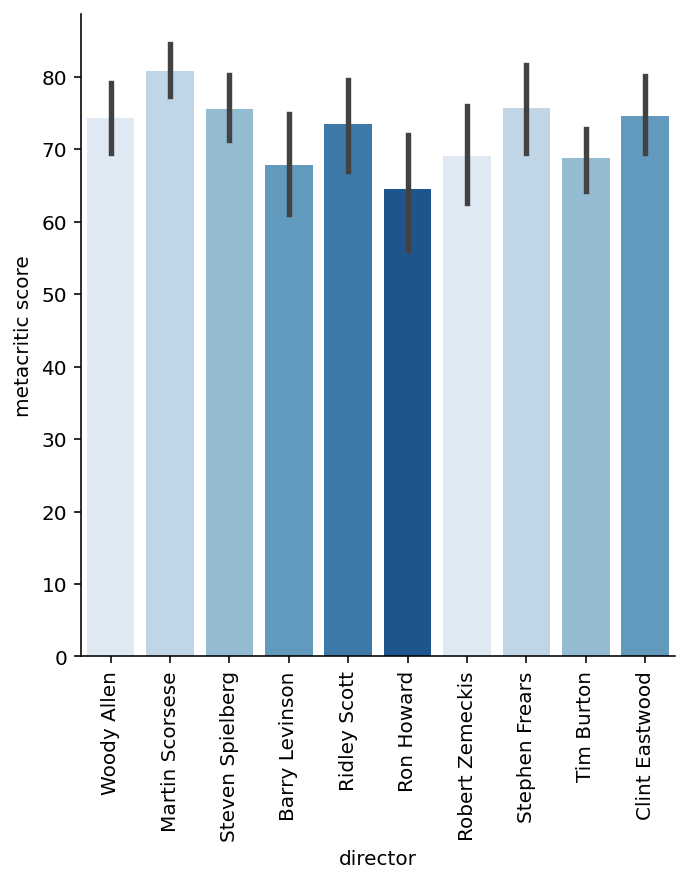

In [80]:
sns.catplot(data=oscars_df, kind="bar", x=top_directors, y="metacritic score",palette = sns.color_palette('Blues'))
plt.xticks(rotation=90);

In [81]:
plt.savefig('director_cat_plot.jpg', dpi=400)

<Figure size 432x288 with 0 Axes>

## Create a lead actor 

In [82]:
oscars_df.groupby('Lead_Actor')['metacritic score'].mean()

Lead_Actor
"Auli'i Cravalho"                    81.0
"Elizabeth 'Eliza' Maganga Nsese"    84.0
"Jack O'Connell"                     59.0
"Latrenda 'Boosie' Ash"              85.0
"O'Shea Jackson Jr."                 72.0
                                     ... 
Yun-Fat Chow                         82.0
Zachary Quinto                       76.0
Zaide Silvia Gutiérrez               67.0
Zain Al Rafeea                       75.0
Ziyi Zhang                           89.0
Name: metacritic score, Length: 645, dtype: float64

In [83]:
oscars_df['Lead_Actor_Prev_Score'] = oscars_df.groupby('Lead_Actor')['metacritic score'].shift(1)

In [84]:
oscars_df[oscars_df['Lead_Actor']=='Robert De Niro'][['release_date','metacritic score','Lead_Actor_Prev_Score']]

release_date  metacritic score  Lead_Actor_Prev_Score
1742   1980-12-19              89.0                    NaN
760    1986-10-31              55.0                   89.0
2344   1990-09-21              90.0                   55.0
2064   1991-01-11              74.0                   90.0
2458   1991-11-15              73.0                   74.0
2044   1995-11-22              73.0                   73.0
2868   1996-10-18              49.0                   73.0
296    2019-11-27              94.0                   49.0

In [85]:
oscars_df['Lead_Actor_Avg_Score'] = oscars_df.groupby('Lead_Actor')['Lead_Actor_Prev_Score'].rolling(2).mean().reset_index(0,drop=True)

In [86]:
oscars_df.Lead_Actor_Avg_Score.fillna(oscars_df.Lead_Actor_Prev_Score, inplace=True)

In [87]:
oscars_df.sort_values('Lead_Actor_Avg_Score',ascending=False)

IMDBId                                        movie title  language  \
2562  tt0104691                           The Last of the Mohicans   English   
2847  tt4209788                                       Molly's Game   English   
2959  tt0119094                                           Face/Off   English   
1987  tt0114287                                            Rob Roy   English   
2844  tt0473444                         Curse of the Golden Flower  Mandarin   
...         ...                                                ...       ...   
2693  tt0282864                                           Promises   English   
2877  tt0373175                                       My Architect   English   
2922  tt3652526                                        Fire at Sea   Italian   
3015  tt0424024                                 Darwin's Nightmare   English   
3036  tt1787725  If a Tree Falls: A Story of the Earth Liberati...   English   

      country  runtime (mins) mpaarating  metacritic score      budget  \
2562      USA             112          R              76.0  40000000.0   
2847    China             140          R              71.0  30000000.0   
2959      USA             138          R              82.0  80000000.0   
1987       UK             139          R              55.0  28000000.0   
2844    China             114          R              70.0  45000000.0   
...       ...             ...        ...               ...         ...   
2693      USA             106    Unrated              80.0         NaN   
2877      USA             116    Unrated              81.0         NaN   
2922    Italy             114    Unrated              87.0         NaN   
3015  Austria             107    Unrated              84.0         NaN   
3036      USA              85    Unrated              65.0   4800000.0   

             distributionCompany                               Awards  ...  \
2562       Twentieth Century Fox                           Best Sound  ...   
2847           STX Entertainment              Best Adapted Screenplay  ...   
2959          Paramount Pictures  Best Effects, Sound Effects Editing  ...   
1987              United Artists      Best Actor in a Supporting Role  ...   
2844      Sony Pictures Classics   Best Achievement in Costume Design  ...   
...                          ...                                  ...  ...   
2693             Cowboy Pictures           Best Documentary, Features  ...   
2877            New Yorker Films           Best Documentary, Features  ...   
2922                 Kino Lorber             Best Documentary Feature  ...   
3015  International Film Circuit           Best Documentary, Features  ...   
3036                Oscilloscope           Best Documentary, Features  ...   

      Awards_Best Picture Awards_Best Sound Dir_Prev_Score Director_Avg_Score  \
2562                  0.0               1.0            NaN                NaN   
2847                  NaN               NaN            NaN                NaN   
2959                  NaN               NaN            NaN                NaN   
1987                  0.0               0.0            NaN                NaN   
2844                  NaN               NaN           89.0               87.0   
...                   ...               ...            ...                ...   
2693                  NaN               NaN            NaN                NaN   
2877                  NaN               NaN            NaN                NaN   
2922                  NaN               NaN            NaN                NaN   
3015                  NaN               NaN            NaN                NaN   
3036                  NaN               NaN            NaN                NaN   

     Total_Director_Movies Lead_Actor_Prev_Score Lead_Actor_Avg_Score  \
2562                     4                  97.0                 97.0   
2847                     1                  95.0                 95.0   
2959                     1    

In [88]:
oscars_df.shape

(1136, 41)

In [89]:
oscars_df['Total_Movies_Lead_Actor']=oscars_df.groupby(['Lead_Actor'])['movie title'].transform('count')

In [90]:
oscars_df['Total_Movies_Lead_Actor'].value_counts()

1     454
2     164
3     141
4     104
5      50
8      48
7      42
6      36
12     24
19     19
9      18
15     15
11     11
10     10
Name: Total_Movies_Lead_Actor, dtype: int64

In [91]:
oscars_df.groupby(['main_genre'])['metacritic score'].mean()

main_genre
Action         66.960265
Adventure      67.605263
Animation      75.307692
Biography      73.738095
Comedy         72.178010
Crime          73.777778
Documentary    81.024390
Drama          72.557927
Family         78.000000
Fantasy        55.000000
Horror         56.500000
Mystery        77.000000
Romance        70.000000
Name: metacritic score, dtype: float64

In [92]:
oscars_df.main_genre.value_counts()

Drama          328
Comedy         191
Biography      168
Action         151
Crime           90
Animation       78
Adventure       76
Documentary     41
Horror           6
Mystery          2
Family           2
Fantasy          2
Romance          1
Name: main_genre, dtype: int64

In [93]:
oscars_df.subgenre.value_counts()

Drama        408
Adventure    134
Romance       92
Comedy        57
Crime         55
Mystery       34
Music         31
History       27
Thriller      27
Fantasy       26
Family        25
Biography     25
War           18
Sci-Fi        16
Action        12
Horror        10
Sport          8
Musical        6
Western        5
News           2
Animation      1
Name: subgenre, dtype: int64

In [94]:
oscars_df['Avg_Rating_by_Genre'] = oscars_df.groupby(['genre'])['metacritic score'].transform('mean')

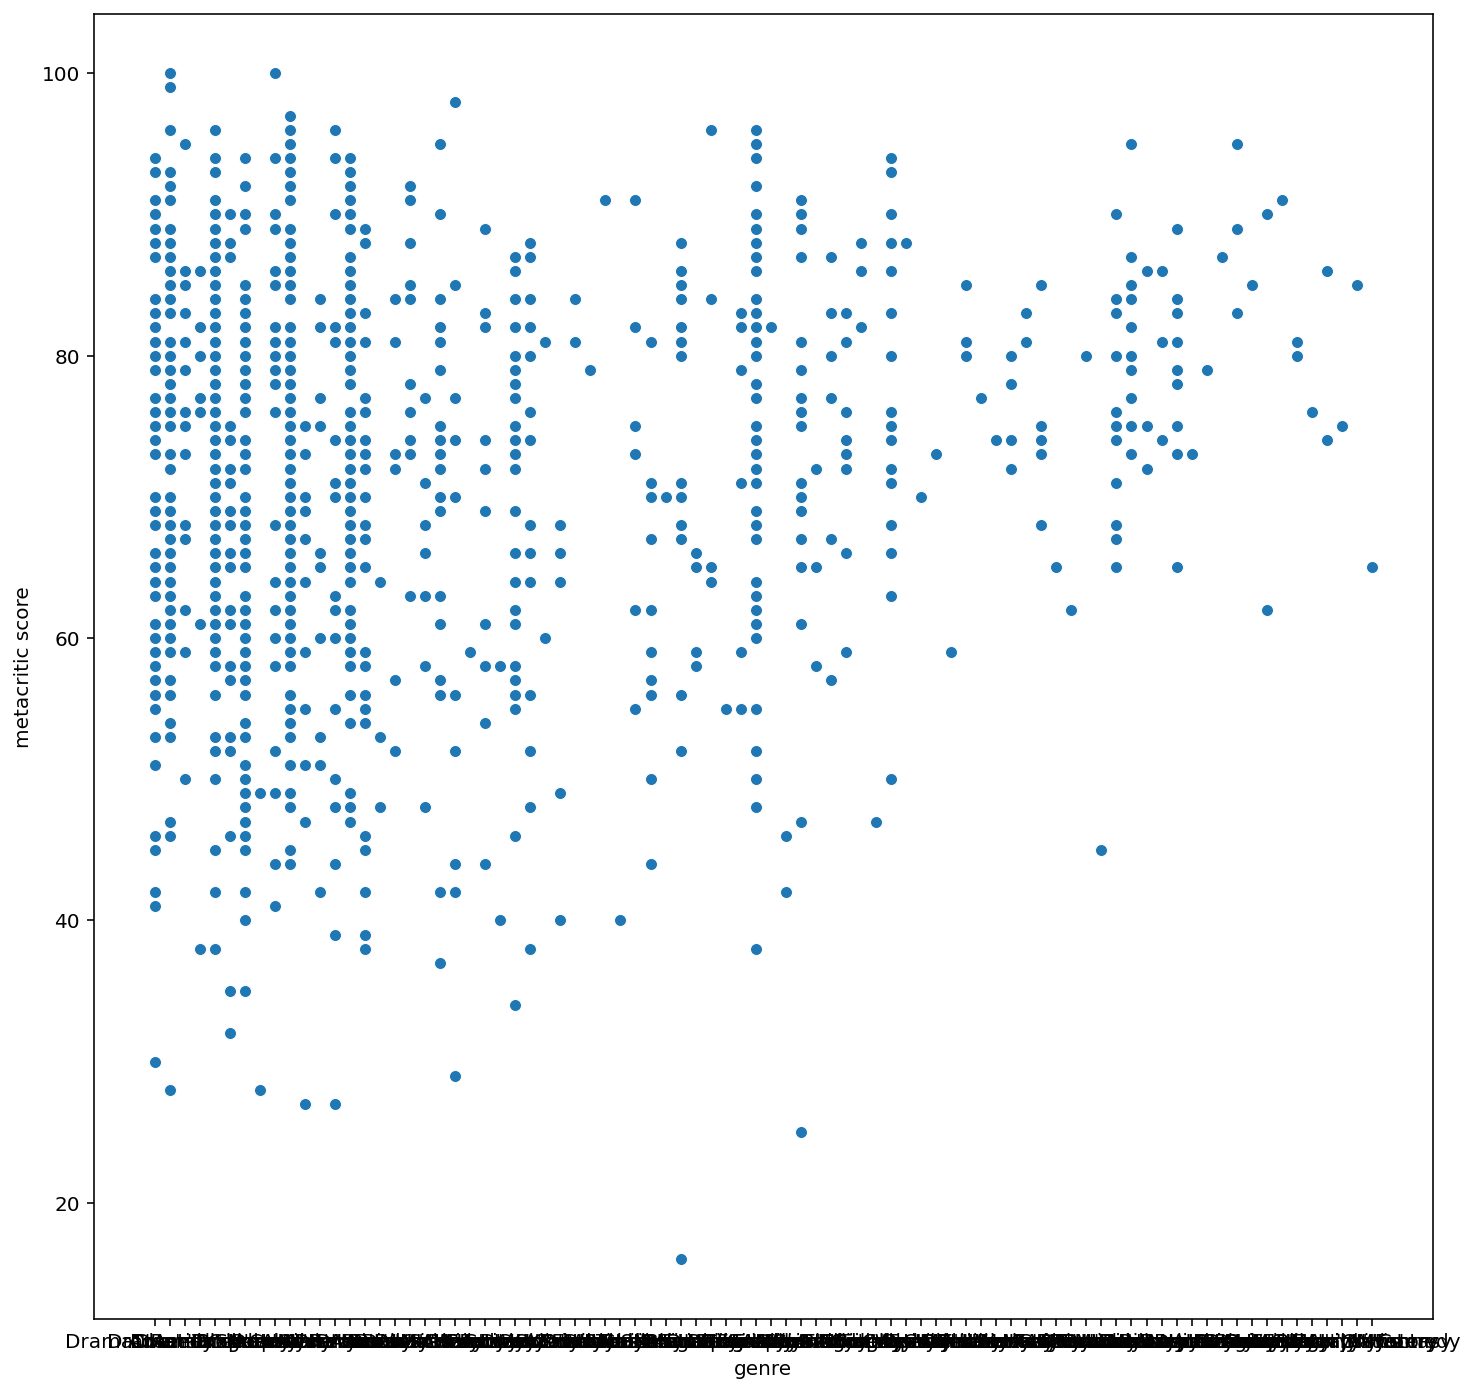

In [95]:
plt.figure(figsize=(12,12))
sns.scatterplot(x=oscars_df['genre'], y="metacritic score", data=oscars_df);

In [96]:
def get_top_ten(column):
    top_ten = oscars_df[column].value_counts().iloc[:10]
    mask = oscars_df[column].isin(top_ten.index)
    return mask

In [97]:
mask = get_top_ten('Lead_Actor')
top_actor = oscars_df['Lead_Actor'][mask].value_counts()

In [98]:
oscars_df.groupby(['genre'])['metacritic score'].mean()

genre
Action' 'Adventure    66.541176
Action' 'Biography    73.000000
Action' 'Comedy       65.250000
Action' 'Crime        70.647059
Action' 'Drama        64.526316
                        ...    
Horror' 'Sci-Fi       49.000000
Horror' 'Thriller     79.000000
Mystery' 'Sci-Fi      74.000000
Mystery' 'Thriller    80.000000
Romance' 'Sci-Fi      70.000000
Name: metacritic score, Length: 82, dtype: float64

In [99]:
oscars_df

IMDBId                                        movie title language  \
2776  tt0077716                                        Ice Castles  English   
2245  tt0079638                                          Norma Rae  English   
2404  tt0078966                                 The China Syndrome  English   
3116  tt0078950                                          The Champ  English   
1596  tt0079522                                          Manhattan  English   
...         ...                                                ...      ...   
2877  tt0373175                                       My Architect  English   
2922  tt3652526                                        Fire at Sea  Italian   
3015  tt0424024                                 Darwin's Nightmare  English   
3030  tt0240885                    Scottsboro: An American Tragedy  English   
3036  tt1787725  If a Tree Falls: A Story of the Earth Liberati...  English   

      country  runtime (mins) mpaarating  metacritic score        budget  \
2776      USA             108         PG              51.0  3.405366e+07   
2245      USA             114         PG              61.0  5.688241e+07   
2404      USA             122         PG              81.0  6.000000e+06   
3116      USA             121         PG              38.0  1.879310e+07   
1596      USA              96          R              83.0  9.000000e+06   
...       ...             ...        ...               ...           ...   
2877      USA             116    Unrated              81.0           NaN   
2922    Italy             114    Unrated              87.0           NaN   
3015  Austria             107    Unrated              84.0           NaN   
3030      USA              84    Unrated              74.0           NaN   
3036      USA              85    Unrated              65.0  4.800000e+06   

              distributionCompany                             Awards  ...  \
2776            Columbia Pictures          Best Music, Original Song  ...   
2245        Twentieth Century Fox     Best Actress in a Leading Role  ...   
2404            Columbia Pictures       Best Actor in a Leading Role  ...   
3116          Metro-Goldwyn-Mayer         Best Music, Original Score  ...   
1596               United Artists  Best Actress in a Supporting Role  ...   
...                           ...                                ...  ...   
2877             New Yorker Films         Best Documentary, Features  ...   
2922                  Kino Lorber           Best Documentary Feature  ...   
3015   International Film Circuit         Best Documentary, Features  ...   
3030  Public Broadcasting Service         Best Documentary, Features  ...   
3036                 Oscilloscope         Best Documentary, Features  ...   

      Awards_Best Sound Dir_Prev_Score Director_Avg_Score  \
2776                NaN            NaN                NaN   
2245                0.0            NaN                NaN   
2404                0.0            NaN                NaN   
3116                NaN            NaN                NaN   
1596                NaN            NaN                NaN   
...                 ...            ...                ...   
2877                NaN            NaN                NaN   
2922                NaN            NaN                NaN   
3015                NaN            NaN                NaN   
3030                NaN            NaN                NaN   
3036                NaN            NaN                NaN   

     Total_Director_Movies Lead_Actor_Prev_Score Lead_Actor_Avg_Score  \
2776                     1                   NaN                  NaN   
2245                     1                   NaN                  NaN   
2404                     1                   NaN                  NaN   
3116                     3                   NaN                  NaN   
1596                    12                   NaN                  NaN   
...                    ...                   ...   

In [100]:
plt.plot(oscars_df['Director_Avg_Score'])

In [101]:
oscars_df.shape

(1136, 42)

In [102]:
oscars_df['Avg_Rating_by_MPAA_Rating'] = oscars_df.groupby(['mpaarating'])['metacritic score'].transform('mean')

In [103]:
oscars_df['Avg_Rating_by_season'] = oscars_df.groupby(['season'])['metacritic score'].transform('mean')

In [104]:
oscars_df['Avg_Rating_by_Distribution_company'] =  oscars_df.groupby(['distributionCompany'])['metacritic score'].transform('mean')

In [105]:
oscars_df['Writer_Prev_Score'] = oscars_df.groupby('writer1')['metacritic score'].shift(1)

In [106]:
oscars_df[oscars_df['writer1']=='Aaron Sorkin'][['release_date','metacritic score','Writer_Prev_Score']]

release_date  metacritic score  Writer_Prev_Score
955    1992-12-11              62.0                NaN
3081   1995-11-17              67.0               62.0
1010   2007-12-21              67.0               67.0
2319   2010-10-01              95.0               67.0
1729   2015-10-23              82.0               95.0
2847   2018-01-05              71.0               82.0

In [107]:
oscars_df['Avg_Rating_by_writer'] = oscars_df.groupby('writer1')['Writer_Prev_Score'].rolling(2).mean().reset_index(0,drop=True)

In [108]:
oscars_df.Avg_Rating_by_writer.fillna(oscars_df.Writer_Prev_Score, inplace=True)

In [109]:
oscars_df[oscars_df['writer1']=='Aaron Sorkin'][['release_date','metacritic score','Writer_Prev_Score','Avg_Rating_by_writer']]

release_date  metacritic score  Writer_Prev_Score  Avg_Rating_by_writer
955    1992-12-11              62.0                NaN                   NaN
3081   1995-11-17              67.0               62.0                  62.0
1010   2007-12-21              67.0               67.0                  64.5
2319   2010-10-01              95.0               67.0                  67.0
1729   2015-10-23              82.0               95.0                  81.0
2847   2018-01-05              71.0               82.0                  88.5

## Create some dummy variables

Use this function to get the top 10 columns to create dummy variables with

In [110]:
def get_top_ten(column):
    top_ten = oscars_df[column].value_counts().iloc[:10]
    mask = oscars_df[column].isin(top_ten.index)
    return mask

In [111]:
mask = get_top_ten('distributionCompany')

In [112]:
oscars_df['distributionCompany'][mask].value_counts()

Paramount Pictures                     101
Warner Bros.                            99
Universal Pictures                      86
Twentieth Century Fox                   78
Columbia Pictures                       72
Sony Pictures Classics                  66
Miramax                                 51
Buena Vista Pictures                    44
Walt Disney Studios Motion Pictures     36
Focus Features                          32
Name: distributionCompany, dtype: int64

In [113]:
top_distribution = oscars_df['distributionCompany']

<AxesSubplot:xlabel='distributionCompany', ylabel='metacritic score'>

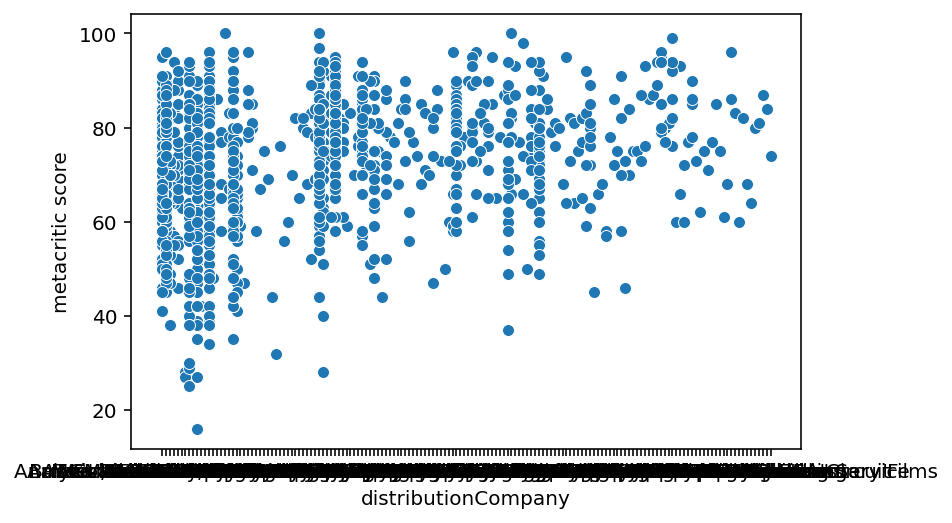

In [114]:
sns.scatterplot(data=oscars_df, x=top_distribution, y="metacritic score")

In [115]:
distro_dummies = pd.get_dummies(oscars_df['distributionCompany'][mask])

In [116]:
oscars_df = pd.concat([oscars_df, distro_dummies], axis=1)

In [117]:
oscars_df.shape

(1136, 57)

## Explore the genre columns

In [118]:
oscars_df['main_genre'].value_counts()

Drama          328
Comedy         191
Biography      168
Action         151
Crime           90
Animation       78
Adventure       76
Documentary     41
Horror           6
Mystery          2
Family           2
Fantasy          2
Romance          1
Name: main_genre, dtype: int64

In [119]:
oscars_df['subgenre'].value_counts()

Drama        408
Adventure    134
Romance       92
Comedy        57
Crime         55
Mystery       34
Music         31
History       27
Thriller      27
Fantasy       26
Family        25
Biography     25
War           18
Sci-Fi        16
Action        12
Horror        10
Sport          8
Musical        6
Western        5
News           2
Animation      1
Name: subgenre, dtype: int64

In [120]:
mask = get_top_ten('main_genre')
oscars_df['main_genre'][mask].value_counts()

Drama          328
Comedy         191
Biography      168
Action         151
Crime           90
Animation       78
Adventure       76
Documentary     41
Horror           6
Mystery          2
Name: main_genre, dtype: int64

In [121]:
main_genre_dummies = pd.get_dummies(oscars_df['main_genre'][mask],prefix='Genre')

In [122]:
oscars_df = pd.concat([oscars_df, main_genre_dummies], axis=1)

In [123]:
oscars_df.head()

IMDBId                 movie title language    country  runtime (mins)  \
0   tt0091763                     Platoon  English        USA             120   
7   tt0082979                        Reds  English        USA             195   
19  tt0084434  An Officer and a Gentleman  English        USA             124   
25  tt0119360                    In & Out  English        USA              90   
26  tt0292542            Son of the Bride  Spanish  Argentina             123   

   mpaarating  metacritic score        budget     distributionCompany  \
0           R              92.0  6.000000e+06          Orion Pictures   
7          PG              76.0  3.200000e+07      Paramount Pictures   
19          R              75.0  7.500000e+06      Paramount Pictures   
25      PG-13              70.0  3.500000e+07      Paramount Pictures   
26          R              68.0  1.193676e+07  Sony Pictures Classics   

                               Awards  ...  Genre_Action Genre_Adventure  \
0     Best Actor in a Supporting Role  ...           0.0             0.0   
7        Best Actor in a Leading Role  ...           0.0             0.0   
19    Best Actor in a Supporting Role  ...           0.0             0.0   
25  Best Actress in a Supporting Role  ...           0.0             0.0   
26         Best Foreign Language Film  ...           0.0             0.0   

   Genre_Animation Genre_Biography Genre_Comedy Genre_Crime Genre_Documentary  \
0              0.0             0.0          0.0         0.0               0.0   
7              0.0             1.0          0.0         0.0               0.0   
19             0.0             0.0          0.0         0.0               0.0   
25             0.0             0.0          1.0         0.0               0.0   
26             0.0             0.0          1.0         0.0               0.0   

   Genre_Drama Genre_Horror Genre_Mystery  
0          1.0          0.0           0.0  
7          0.0          0.0           0.0  
19         1.0          0.0           0.0  
25         0.0          0.0           0.0  
26         0.0          0.0           0.0  

[5 rows x 67 columns]

In [124]:
mask = get_top_ten('subgenre')
oscars_df['subgenre'][mask].value_counts()

Drama        408
Adventure    134
Romance       92
Comedy        57
Crime         55
Mystery       34
Music         31
Thriller      27
History       27
Fantasy       26
Name: subgenre, dtype: int64

In [125]:
subgenre_dummies = pd.get_dummies(oscars_df['subgenre'][mask],prefix='Subgenre')

In [126]:
oscars_df = pd.concat([oscars_df, subgenre_dummies], axis=1)

In [127]:
oscars_df.head()

IMDBId                 movie title language    country  runtime (mins)  \
0   tt0091763                     Platoon  English        USA             120   
7   tt0082979                        Reds  English        USA             195   
19  tt0084434  An Officer and a Gentleman  English        USA             124   
25  tt0119360                    In & Out  English        USA              90   
26  tt0292542            Son of the Bride  Spanish  Argentina             123   

   mpaarating  metacritic score        budget     distributionCompany  \
0           R              92.0  6.000000e+06          Orion Pictures   
7          PG              76.0  3.200000e+07      Paramount Pictures   
19          R              75.0  7.500000e+06      Paramount Pictures   
25      PG-13              70.0  3.500000e+07      Paramount Pictures   
26          R              68.0  1.193676e+07  Sony Pictures Classics   

                               Awards  ...  Subgenre_Adventure  \
0     Best Actor in a Supporting Role  ...                 NaN   
7        Best Actor in a Leading Role  ...                 0.0   
19    Best Actor in a Supporting Role  ...                 0.0   
25  Best Actress in a Supporting Role  ...                 0.0   
26         Best Foreign Language Film  ...                 0.0   

   Subgenre_Comedy Subgenre_Crime Subgenre_Drama Subgenre_Fantasy  \
0              NaN            NaN            NaN              NaN   
7              0.0            0.0            1.0              0.0   
19             0.0            0.0            0.0              0.0   
25             0.0            0.0            0.0              0.0   
26             0.0            0.0            1.0              0.0   

   Subgenre_History Subgenre_Music Subgenre_Mystery Subgenre_Romance  \
0               NaN            NaN              NaN              NaN   
7               0.0            0.0              0.0              0.0   
19              0.0            0.0              0.0              1.0   
25              0.0            0.0              0.0              1.0   
26              0.0            0.0              0.0              0.0   

   Subgenre_Thriller  
0                NaN  
7                0.0  
19               0.0  
25               0.0  
26               0.0  

[5 rows x 77 columns]

## Create dummy for directors

In [128]:
mask = get_top_ten('director')
oscars_df['director'][mask].value_counts()

Steven Spielberg    20
Martin Scorsese     15
Woody Allen         12
Clint Eastwood      12
Ron Howard          11
Tim Burton          11
Robert Zemeckis     11
Stephen Frears       9
Ridley Scott         9
Barry Levinson       8
Name: director, dtype: int64

In [129]:
director_dummies = pd.get_dummies(oscars_df['director'][mask],prefix='Director')

In [130]:
oscars_df = pd.concat([oscars_df, director_dummies], axis=1)

In [131]:
oscars_df.head()

IMDBId                 movie title language    country  runtime (mins)  \
0   tt0091763                     Platoon  English        USA             120   
7   tt0082979                        Reds  English        USA             195   
19  tt0084434  An Officer and a Gentleman  English        USA             124   
25  tt0119360                    In & Out  English        USA              90   
26  tt0292542            Son of the Bride  Spanish  Argentina             123   

   mpaarating  metacritic score        budget     distributionCompany  \
0           R              92.0  6.000000e+06          Orion Pictures   
7          PG              76.0  3.200000e+07      Paramount Pictures   
19          R              75.0  7.500000e+06      Paramount Pictures   
25      PG-13              70.0  3.500000e+07      Paramount Pictures   
26          R              68.0  1.193676e+07  Sony Pictures Classics   

                               Awards  ...  Director_Barry Levinson  \
0     Best Actor in a Supporting Role  ...                      NaN   
7        Best Actor in a Leading Role  ...                      NaN   
19    Best Actor in a Supporting Role  ...                      NaN   
25  Best Actress in a Supporting Role  ...                      NaN   
26         Best Foreign Language Film  ...                      NaN   

   Director_Clint Eastwood Director_Martin Scorsese Director_Ridley Scott  \
0                      NaN                      NaN                   NaN   
7                      NaN                      NaN                   NaN   
19                     NaN                      NaN                   NaN   
25                     NaN                      NaN                   NaN   
26                     NaN                      NaN                   NaN   

   Director_Robert Zemeckis Director_Ron Howard Director_Stephen Frears  \
0                       NaN                 NaN                     NaN   
7                       NaN                 NaN                     NaN   
19                      NaN                 NaN                     NaN   
25                      NaN                 NaN                     NaN   
26                      NaN                 NaN                     NaN   

   Director_Steven Spielberg Director_Tim Burton Director_Woody Allen  
0                        NaN                 NaN                  NaN  
7                        NaN                 NaN                  NaN  
19                       NaN                 NaN                  NaN  
25                       NaN                 NaN                  NaN  
26                       NaN                 NaN                  NaN  

[5 rows x 87 columns]

In [132]:
oscars_df.columns

Index(['IMDBId', 'movie title', 'language', 'country', 'runtime (mins)',
       'mpaarating', 'metacritic score', 'budget', 'distributionCompany',
       'Awards', 'Total_Noms', 'writer1', 'writer2', 'director', 'Lead_Actor',
       'Supporting_Actor_1', 'Supporting_Actor_2', 'genre', 'main_genre',
       'subgenre', 'release_date', 'season', 'Award_Year',
       'Awards_Best Actor in a Leading Role',
       'Awards_Best Actor in a Supporting Role',
       'Awards_Best Actress in a Leading Role',
       'Awards_Best Art Direction-Set Decoration',
       'Awards_Best Cinematography', 'Awards_Best Director',
       'Awards_Best Film Editing', 'Awards_Best Motion Picture of the Year',
       'Awards_Best Picture', 'Awards_Best Sound', 'Dir_Prev_Score',
       'Director_Avg_Score', 'Total_Director_Movies', 'Lead_Actor_Prev_Score',
       'Lead_Actor_Avg_Score', 'Total_Movies_Lead_Actor', 'Award_Prev_Score',
       'Award_Avg_Score', 'Avg_Rating_by_Genre', 'Avg_Rating_by_MPAA_Rating',
     

## Create dummy for lead actors

In [133]:
mask = get_top_ten('Lead_Actor')
oscars_df['Lead_Actor'][mask].value_counts()

Tom Hanks            19
Meryl Streep         15
Leonardo DiCaprio    12
Tom Cruise           12
Brad Pitt            11
Johnny Depp          10
Harrison Ford         9
Robin Williams        9
Michael Douglas       8
Denzel Washington     8
Name: Lead_Actor, dtype: int64

In [134]:
actor_dummies = pd.get_dummies(oscars_df['Lead_Actor'][mask],prefix='Lead_Actor')

In [135]:
oscars_df = pd.concat([oscars_df, actor_dummies], axis=1)

## Create dummies for season

In [136]:
season_dummies = pd.get_dummies(oscars_df['season'])

In [137]:
oscars_df = pd.concat([oscars_df, season_dummies], axis=1)

## Create dummies for rating

In [138]:
top_six = oscars_df['mpaarating'].value_counts().iloc[:6]
mask = oscars_df['mpaarating'].isin(top_six.index)
ratings_dummies = pd.get_dummies(oscars_df['mpaarating'][mask])

In [139]:
oscars_df = pd.concat([oscars_df, ratings_dummies], axis=1)

## Create dummies for writers

In [140]:
mask = get_top_ten('writer1')


In [141]:
writer_dummies = pd.get_dummies(oscars_df['writer1'][mask],prefix='Writer')

In [142]:
oscars_df = pd.concat([oscars_df, writer_dummies], axis=1)

In [143]:
oscars_df.shape

(1136, 117)

In [144]:
oscars_df.columns

Index(['IMDBId', 'movie title', 'language', 'country', 'runtime (mins)',
       'mpaarating', 'metacritic score', 'budget', 'distributionCompany',
       'Awards',
       ...
       'Writer_Aaron Sorkin', 'Writer_George Miller', 'Writer_Joel Coen',
       'Writer_John Logan', 'Writer_Lawrence Kasdan', 'Writer_Lee Hall',
       'Writer_Paul Thomas Anderson', 'Writer_Pedro Almodóvar',
       'Writer_Quentin Tarantino', 'Writer_Woody Allen'],
      dtype='object', length=117)

In [145]:
oscars_df.to_csv('oscar_movies_data_2.csv',encoding='utf-8-sig')

In [146]:
grouped = oscars_df.groupby(['release_date'])['director','release_date','movie title']
grouped.head()

<ipython-input-146-6c563d609109>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped = oscars_df.groupby(['release_date'])['director','release_date','movie title']


director release_date                 movie title
0             Oliver Stone   1987-02-06                     Platoon
7            Warren Beatty   1981-12-25                        Reds
19         Taylor Hackford   1982-08-13  An Officer and a Gentleman
25                Frank Oz   1997-09-19                    In & Out
26    Juan José Campanella   2001-08-16            Son of the Bride
...                    ...          ...                         ...
3292         Curtis Hanson   2002-11-08                      8 Mile
3293            Tim Burton   1999-11-19               Sleepy Hollow
3296       Joel Schumacher   2004-12-10    The Phantom of the Opera
3299   Phil Alden Robinson   1989-05-05             Field of Dreams
3302        Albert Magnoli   1984-07-27                 Purple Rain

[1129 rows x 3 columns]

In [101]:
def get_average(column,grouped):
    for release_date,director in grouped:
        return True
    return 0